<a href="https://colab.research.google.com/github/akanksha-parasar/Text-Based-Emotion-Detection/blob/main/Text_Based_ED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/youtube.csv')
data

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officially before 7B views,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?*\n\n*Me: Around one Despacito*,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendation you searched for it,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Checking Views,2020-09-08T09:53:24Z,122
...,...,...,...,...,...,...,...
19295,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxqlnG8nQ36eDoXKbJ4AaABAg,KineZ,Claim your “before 1 billion” certificate here,2020-07-28T18:39:38Z,5087
19296,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgwZsgM-0pn9tiFxmOh4AaABAg,varun raj,This means that you are before 1 billion views.,2020-09-09T11:41:30Z,6
19297,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxeBmhoyhSILM0HPux4AaABAg,hey harry,We won't have school till 2021 \nMay God help me -_-,2020-09-09T10:03:04Z,5
19298,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,Ugy6KVBjdz7Rj2yxTER4AaABAg,Jannat EXO-L,Literally saw this song from 1M -> 996M,2020-09-08T19:41:18Z,4


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
comment = []
comment = data.pop('Comment')
df = pd.DataFrame({'Comment': comment})
df

,Comment
0,The people who liked this comment is officiall...
1,"- Wait, it's 7B views\n- Always has been"
2,*Teacher: What is the population of the Earth?...
3,Let's be honest this wasn't your recommendatio...
4,Types Of People:\n10% Enjoying Song \n90% Chec...
...,...
11686,near the end of 2020 and here I am having a br...
11687,2010-2014 were good years for me 😭😭😭
11688,Whose watching this in 2020???
11689,me whos listening to this after hours od Being...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11691 entries, 0 to 11690
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  11691 non-null  object
dtypes: object(1)
memory usage: 91.5+ KB


In [ ]:
df.shape

(11691, 1)

In [ ]:
# To check full comment
pd.set_option("display.max_colwidth",None)
df.head(10)
# if we use the functionality of google collab to convert data frame to interactive table then we can see the full comments 

,Comment
0,The people who liked this comment is officially before 7B views
1,"- Wait, it's 7B views\n- Always has been"
2,*Teacher: What is the population of the Earth?*\n\n*Me: Around one Despacito*
3,Let's be honest this wasn't your recommendation you searched for it
4,Types Of People:\n10% Enjoying Song \n90% Checking Views
5,3.2 Million comments if you find mine your a legend
6,"claim your “here before 7 billion” tickets here, they’ll be out pretty soon 😼"
7,The ones who are NOT from Tik-Tok can like this comment.
8,Song: spanish\nComments: English\nHotel: trivago
9,Kimler burda😂🥰🌹


In [ ]:
# Removing emojies
df = df.astype(str).apply(lambda x: x.str.encode('ascii','ignore').str.decode('ascii'))
df.head(10)

,Comment
0,The people who liked this comment is officially before 7B views
1,"- Wait, it's 7B views\n- Always has been"
2,*Teacher: What is the population of the Earth?*\n\n*Me: Around one Despacito*
3,Let's be honest this wasn't your recommendation you searched for it
4,Types Of People:\n10% Enjoying Song \n90% Checking Views
5,3.2 Million comments if you find mine your a legend
6,"claim your here before 7 billion tickets here, theyll be out pretty soon"
7,The ones who are NOT from Tik-Tok can like this comment.
8,Song: spanish\nComments: English\nHotel: trivago
9,Kimler burda


In [ ]:
# Removing Punctuations -
# df1 = df1.replace('\-','',regex=True)
# df1 = df1.replace('\?','',regex=True)
# df1 = df1.replace('\n','',regex=True)
# df1 = df1.replace('*','',regex=True)
# df1 = df1.replace(':','',regex=True)
# df1 = df1.replace('\%','',regex=True)
# df1 = df1.replace('\.','',regex=True)
# df1 = df1.replace('\#','',regex=True)
# df1 = df1.replace('\@','',regex=True)
# df1 = df1.replace('\>','',regex=True)
# df1 = df1.replace('\<','',regex=True)
# df1 = df1.replace('\"','',regex=True)
# df1 = df1.replace('\;','',regex=True)
# df1 = df1.replace('\~','',regex=True)
# df1 = df1.replace('\(','',regex=True)
# df1 = df1.replace('\)','',regex=True)
# df1.head(10)

In [ ]:
import sys
import unicodedata
#dictionary of punctuation marks
keys = [i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P')]
# punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))
punctuation = dict.fromkeys(keys,' ')

In [ ]:
#dictionary of new_line '\n' and tab '\t'
new_line_tab = str.maketrans({chr(10): ' ', chr(9): ' '})

In [ ]:
import re
def preprocessor(text):
    text = re.sub('\n', ' ', text) # remove new lines
    text = re.sub('\t', ' ', text) # remove tabs
    text = re.sub('@[A-Za-z0–9]+', ' ', text) #Removing tag(@)
    text = re.sub('#', ' ', text) # Removing hashtag(#)
#     text = re.sub('https?:\/\/\S+', ' ', text) # Removing links
    text = re.sub(r'http\S+', ' ', text) #remove https links
    text = re.sub('<[^<]+?>', ' ', text) #remove html tags
    text = re.sub(r'[^\w]', ' ', text) #remove non-alphanumerc characters
#     text = re.sub('httpS+s*', ' ', text)  # remove URLs
#     text = re.sub('RT|cc', ' ', text)  # remove RT and cc
#     text = re.sub('#S+', '', text)  # remove hashtags
#     text = re.sub('@S+', '  ', text)  # remove mentions
#     text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', text)  # remove punctuations
#     text = re.sub(r'[^x00-x7f]',r' ', text) 
    text = text.translate(punctuation)
#     text = re.sub('s+', ' ', text)  # remove extra whitespace
    text = text.lower()
    text = text.strip()
    text = text.translate(new_line_tab)
    return text
df['Comment'] = df['Comment'].apply(lambda x: preprocessor(x))

In [ ]:
df

,Comment
0,the people who liked this comment is officially before 7b views
1,wait it s 7b views always has been
2,teacher what is the population of the earth me around one despacito
3,let s be honest this wasn t your recommendation you searched for it
4,types of people 10 enjoying song 90 checking views
...,...
11686,near the end of 2020 and here i am having a breakdown blasting throwbacks
11687,2010 2014 were good years for me
11688,whose watching this in 2020
11689,me whos listening to this after hours od being drunk


In [ ]:
# Checking some comments
pd.set_option("display.max_colwidth",-1) # To see full comment
# df1.head(10) # for first 10 rows
df.sample(10) # for random 10 rows

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Comment
3154,then 10m likes 11m dislikes now 14 m likes 11m dislikes improvement
4750,nostalgia
9656,no bro me record s mi ex
6117,recordando mis 14 aos esos tiempos eran los mejores y no lo sabiamos alguien en agosto de 2020
5364,omg u ppl need to chill yes this song is sexual but so what ari is a grown woman if you can t handle it then you shouldn t be here
3852,it took so many years for me to realize that was megan fox
3563,ellie what are you waiting for me sherlock holmes 5 season wicher 2 season
10995,comparte vamos por los 10 millones en un dia lo lograremos
10800,de qu equipo eres teamvainaloca o teamsguelobailando which team are you in teamvainaloca or teamsiguelobailando djame saber abajo en los comentarios
10622,english people who comes from tik tok gente espaola willyrex a que se debe el exito de esta cancin 1300mi vistas 20 coldplay muy conocida banda 25 la cancin es muy buena 10 tik tok 1 promueve el cuidado de elefantes video clip 44 willy


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
df['Comment'] = df['Comment'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop)]))
df.head(10)

,Comment
0,people liked comment officially 7b views
1,wait 7b views always
2,teacher population earth around one despacito
3,let honest recommendation searched
4,types people 10 enjoying song 90 checking views
5,3 2 million comments find mine legend
6,claim 7 billion tickets theyll pretty soon
7,ones tik tok like comment
8,song spanish comments english hotel trivago
9,kimler burda


In [ ]:
df = [x.strip() for x in df.Comment] # Remove leading and Trailing characters
df = [x for x in df if x] # It removes empty strings, because they are considered as False in python

In [ ]:
 !pip install afinn
from afinn import Afinn

     |████████████████████████████████| 52 kB 1.3 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=acebdef78a1fd31a0fde6024fa208209388b8a43bd4eb90275d00e2d060993d5
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [ ]:
afn = Afinn()

In [ ]:
# Compute score (polarity) and labels
scores = [afn.score(Comment) for Comment in df]
sentiment = ['happy' if score > 0
                        else 'sad' if score < 0
                            else 'neutral'
                                for score in scores]

In [ ]:
# Creating the dataframe
sent_df = pd.DataFrame()
sent_df['title'] = df
sent_df['scores'] = scores
sent_df['sentiments'] = sentiment

In [ ]:
sent_df.head(50)

,title,scores,sentiments
0,people liked comment officially 7b views,2.0,happy
1,wait 7b views always,0.0,neutral
2,teacher population earth around one despacito,0.0,neutral
3,let honest recommendation searched,2.0,happy
4,types people 10 enjoying song 90 checking views,2.0,happy
5,3 2 million comments find mine legend,0.0,neutral
6,claim 7 billion tickets theyll pretty soon,1.0,happy
7,ones tik tok like comment,2.0,happy
8,song spanish comments english hotel trivago,0.0,neutral
9,kimler burda,0.0,neutral


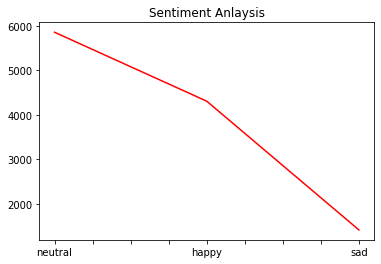

In [ ]:
sent_df.sentiments.value_counts().plot(kind='line', color='red')
plt.title('Sentiment Anlaysis')
plt.show()

In [ ]:
sent_df['word_count'] = sent_df['title'].str.split().apply(len)
sent_df.head(10)

,title,scores,sentiments,word_count
0,people liked comment officially 7b views,2.0,happy,6
1,wait 7b views always,0.0,neutral,4
2,teacher population earth around one despacito,0.0,neutral,6
3,let honest recommendation searched,2.0,happy,4
4,types people 10 enjoying song 90 checking views,2.0,happy,8
5,3 2 million comments find mine legend,0.0,neutral,7
6,claim 7 billion tickets theyll pretty soon,1.0,happy,7
7,ones tik tok like comment,2.0,happy,5
8,song spanish comments english hotel trivago,0.0,neutral,6
9,kimler burda,0.0,neutral,2


In [ ]:
sent_df['scores'].describe()

count    11571.000000
mean     1.317432    
std      7.075449    
min     -61.000000   
25%      0.000000    
50%      0.000000    
75%      2.000000    
max      304.000000  
Name: scores, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


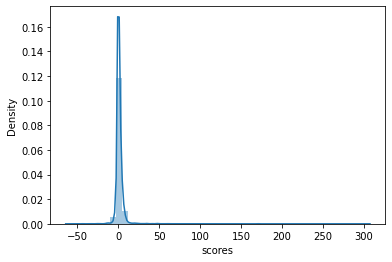

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['scores'])

In [ ]:
sent_df['index'] = range(0, len(sent_df))

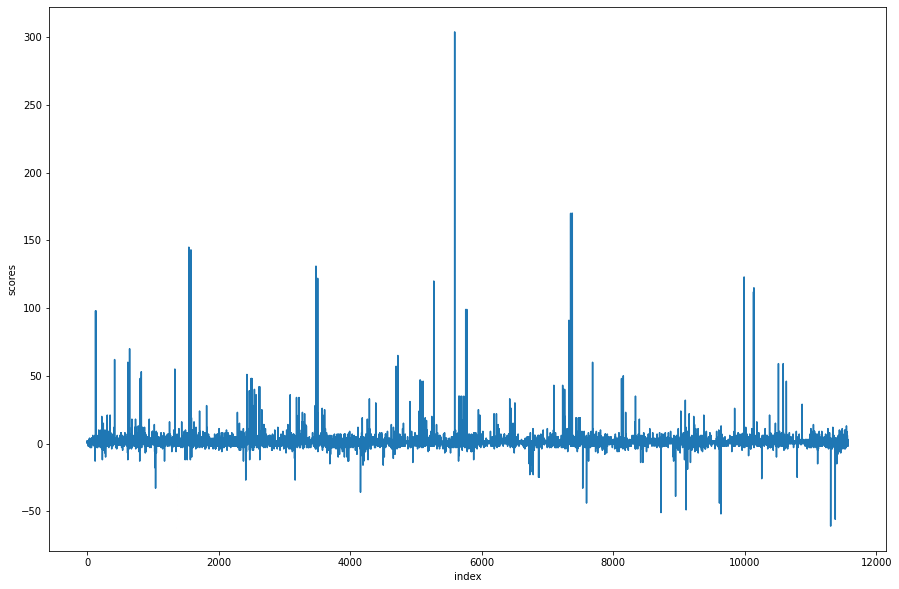

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='scores', x='index', data=sent_df)

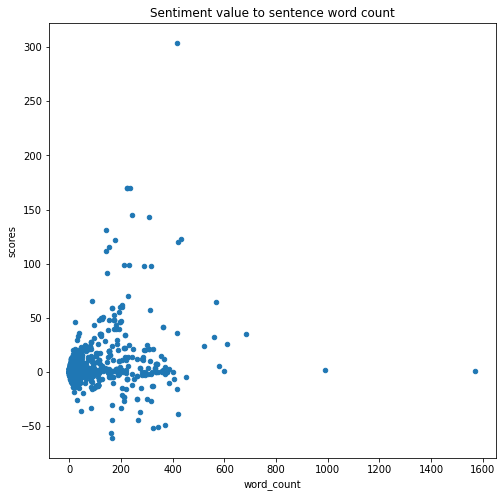

In [ ]:
sent_df.plot.scatter(x='word_count', y='scores', figsize=(8,8), title="Sentiment value to sentence word count")

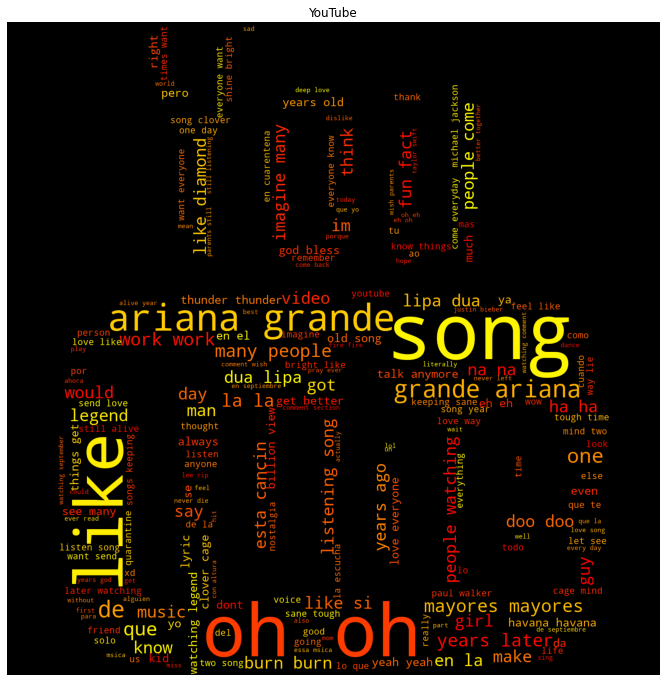

In [ ]:
# setting up stop words 
# nltk.download('stopwords')
stpwrd = set(nltk.corpus.stopwords.words('english'))
 
# Combining all commen ts text
allWords = ' '.join([Comments for Comments in sent_df['title']])
 
# # Image we will use for Word's cloud mask
# from google.colab import files
# uploaded = files.upload()
 
# # by default files are uploaded in /content folder 
# import cv2
# image = cv2.imread('/content/'+next(iter(uploaded))) 
# !pip install opencv-python
import cv2
image = cv2.imread('/content/youtube-logotype.png') 
YouTube = image

# word cloud
def word_cloud(data, title, mask=None):
    Cloud = WordCloud(scale=3,
                      random_state=21,
                      colormap='autumn',
                      mask=mask,
                      stopwords=stpwrd,
                      collocations=True,).generate(data)
    plt.figure(figsize=(20,12))
    plt.imshow(Cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
 
# plot it
word_cloud(allWords, 'YouTube', mask=YouTube)